In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for plotting
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [2]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target
X = cancer_data.data
X = preprocessing.scale(X)

In [13]:
X = X[:,:2]

In [44]:

X.shuffle()

AttributeError: 'numpy.ndarray' object has no attribute 'shuffle'

In [58]:
theta = np.zeros(X.shape[1])
theta_0 = 0
eta = 0.001
lam = 0.045
epochs = 100

for e in range(epochs):
    for i in range(len(X)):
        if y[i]*(np.inner(theta, X[i]) + theta_0) <= 1:
            theta -= eta*(lam*theta - y[i]*X[i])
            theta_0 -= eta*y[i]
        else:
            theta -= eta*lam*theta

        print(theta, theta_0)

[-0.00109706  0.00207334] 0.001
[-0.00292684  0.00242687] 0.002
[-0.00450659  0.00197058] 0.003
[-0.00373748  0.00171676] 0.004
[-0.00548761  0.0028685 ] 0.005
[-0.00501099  0.0037037 ] 0.006
[-0.00618167  0.00354289] 0.007
[-0.00606287  0.00318428] 0.008
[-0.00574243  0.0025953 ] 0.009000000000000001
[-0.00526864  0.00148975] 0.010000000000000002
[-0.00580596  0.00057041] 0.011000000000000003
[-0.00627509  0.00089609] 0.012000000000000004
[-0.00770701 -0.00038625] 0.013000000000000005
[-0.00819594 -0.00147072] 0.014000000000000005
[-0.00808273 -0.00224333] 0.015000000000000006
[-0.00819958 -0.00416314] 0.016000000000000007
[-0.00835619 -0.00435851] 0.017000000000000008
[-0.00892461 -0.00468185] 0.01800000000000001
[-0.01053818 -0.00534727] 0.01900000000000001
[-0.01070451 -0.00649419] 0.01800000000000001
[-0.01100147 -0.0073269 ] 0.017000000000000008
[-0.01231405 -0.00892053] 0.016000000000000007
[-0.01265793 -0.0077497 ] 0.017000000000000008
[-0.01465475 -0.00862208] 0.01800000000000

In [67]:
cum = 0

for i in range(len(X)):
    cum += X[i]*y[i]

In [71]:
cum/(len(X)*0.045)

array([-15.68725933,  -8.92173301])

In [55]:
y[y==0] = -1

In [57]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1

In [48]:
model_trained.coef_

array([[-1.29972082, -0.41477135]])

In [49]:
model_trained.intercept_

array([0.493])

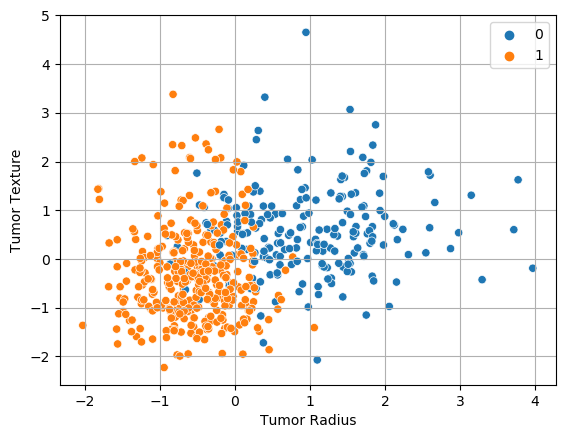

In [14]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [15]:
alpha = np.arange(1e-15, 1, 0.005)
val_scores = np.zeros((len(alpha), 1))

for i in range(len(alpha)):

    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

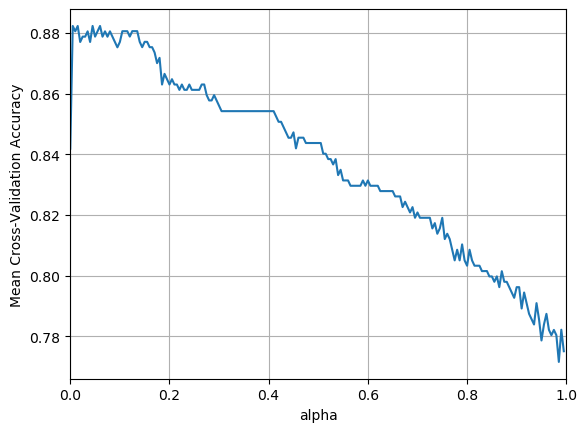

In [16]:
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.045000000000001


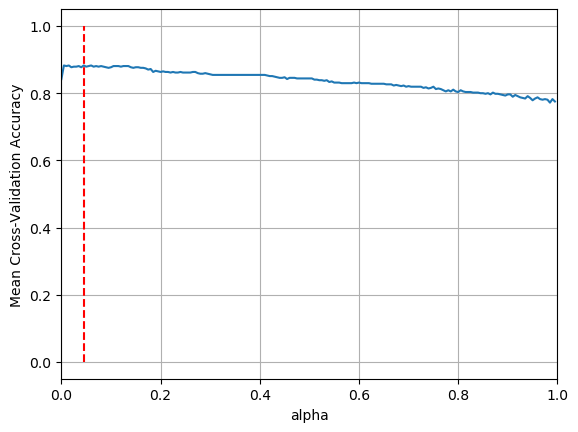

In [18]:


# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
# plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

Training Accuracy = 0.8822495606326889


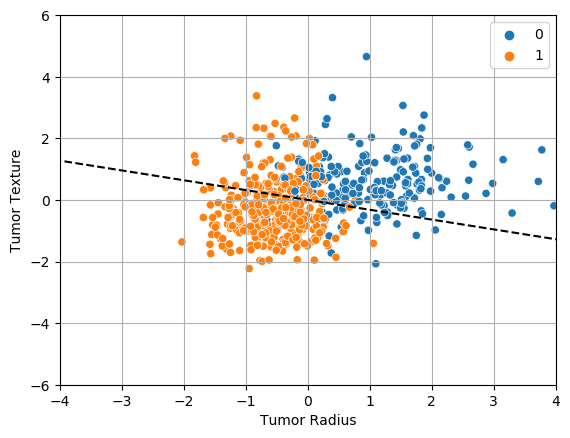

In [38]:

# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star, learning_rate="constant", eta0=0.001)
model_trained = model_star.fit(X,y)
print('Training Accuracy =', model_trained.score(X,y))
# Training Accuracy = 0.9806678383128296

# Plot decision boundary of trained model
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [30]:
model_trained.coef_

array([[-1.34855453, -0.41258457]])